# Aula 2

In [1]:
import pandas as pd

dataframe = pd.read_csv("CC GENERAL.csv")
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [2]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [3]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [4]:
from sklearn.preprocessing import Normalizer
values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Aula 3

In [6]:
from sklearn import metrics
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.364439277430815


# Aula 4

In [7]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

1.075878703157104


# Aula 5

In [8]:
calinski = metrics.calinski_harabasz_score(values, labels)
print(calinski)

3431.7825481721115


# Aula 6

In [9]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [10]:
s1, dbs1, calinski1 = clustering_algorithm(3, values)
print(s1, dbs1, calinski1)

0.3272203126696238 1.3096073640088433 3526.440519908274


In [11]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
print(s2, dbs2, calinski2)

0.36454314826693845 1.075812734747931 3431.8005407346513


In [12]:
s3, dbs3, calinski3 = clustering_algorithm(50, values)
print(s3, dbs3, calinski3)

0.24516886298820098 1.2114339948111372 1619.8360707159686


In [13]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(5, random_data)
print(s, dbs, calinski)
print(s2, dbs2, calinski2)

0.03980200780003991 3.5011588764263673 305.11480891561735
0.36454314826693845 1.075812734747931 3431.8005407346513


In [14]:
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(5, set1)
s2, dbs2, calinski2 = clustering_algorithm(5, set2)
s3, dbs3, calinski3 = clustering_algorithm(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3709892317069683 1.0421931450476152 1200.2020718284073
0.35325029594762064 1.142882769561075 1194.939766435848
0.36703406528773175 1.09892070856634 1167.5339286226883


# Aula 7

In [15]:
#as vezes é preciso executar duas vezes esse trecho para a imagem aparecer na tela
import matplotlib.pyplot as plt
plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

<Figure size 640x480 with 1 Axes>

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


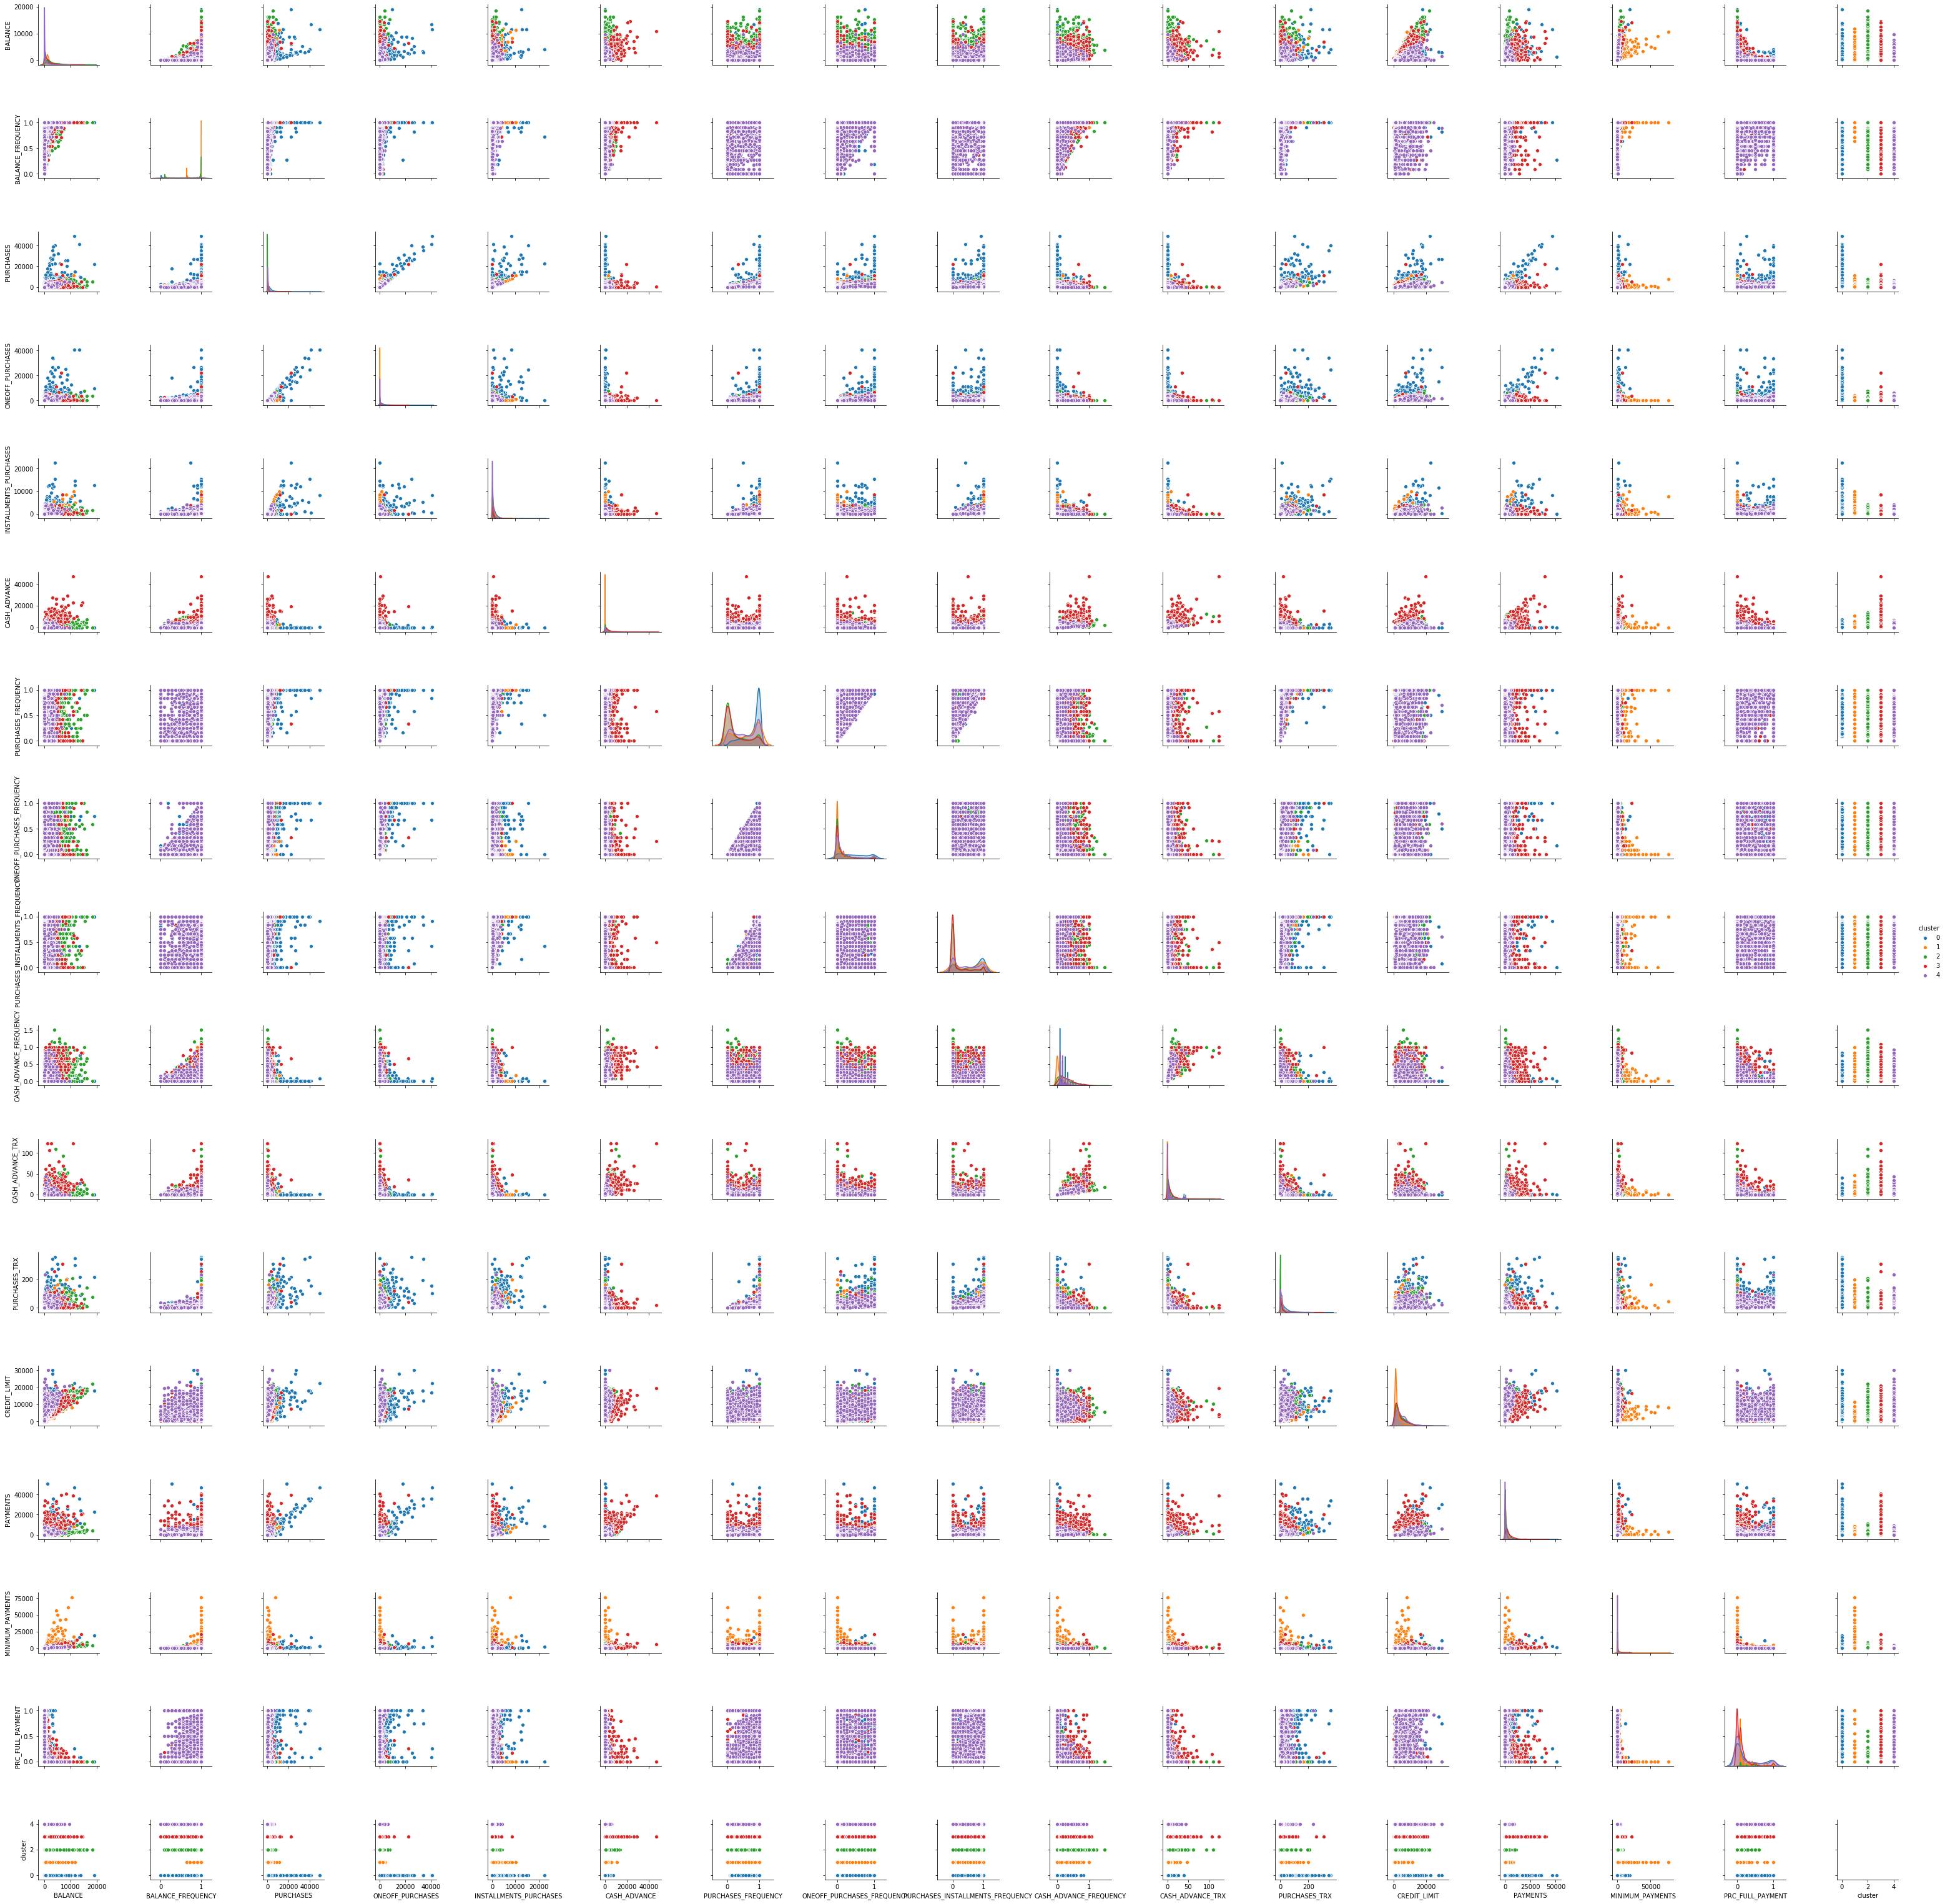

In [16]:
#é normal demorar bastante para executar o pairplot
#e se aparecer uma mensagem em vermelho do tipo "RuntimeWarning", pode ignorar e continue esperando que uma hora os gráficos vão aparecer :)
import seaborn as sns
dataframe["cluster"] = labels
sns.pairplot(dataframe[0:], hue="cluster")

# Aula 8

In [17]:
dataframe.groupby("cluster").describe()

BALANCE                                                    \
          count         mean          std        min          25%   
cluster                                                             
0        1541.0  1140.395363  1663.836536   0.000000   209.490297   
1         412.0  1987.146873  1852.215743  70.794108  1020.146724   
2        2649.0  3037.962543  2478.838161   6.824905  1256.612223   
3        1072.0  1794.024195  1982.950586   0.000000   506.925348   
4        3276.0   444.212219   846.809334   0.000000    23.287145   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0         552.464447  1369.969909  19043.138560            1541.0  0.928099   
1        1338.918346  2133.415063  11670.179850             412.0  0.989512   
2        2174.018945  4223.867789  18495.558550            2649.0  0.963740   
3        1087.920500  2308.762488  14581.459140            1072.0  0.862131   
4          82.992153   411.833075   9630.367575            3276.0  0.774280   

         ... MINIMUM_PAYMENTS               PRC_FULL_PAYMENT            \
         ...              75%           max            count      mean   
cluster  ...                                                             
0        ...       523.422296  18621.013310           1541.0  0.279266   
1        ...      7086.774783  76406.207520            412.0  0.019271   
2        ...      1330.593643   8345.641905           2649.0  0.001799   
3        ...       884.718306  21235.065300           1072.0  0.117384   
4        ...       248.900782   4483.503862           3276.0  0.246293   

                                                      
              std  min  25%       50%       75%  max  
cluster                                               
0        0.367477  0.0  0.0  0.083333  0.545455  1.0  
1        0.090795  0.0  0.0  0.000000  0.000000  1.0  
2        0.023260  0.0  0.0  0.000000  0.000000  0.6  
3        0.186853  0.0  0.0  0.083333  0.142857  1.0  
4        0.346454  0.0  0.0  0.000000  0.444444  1.0  

[5 rows x 128 columns]

In [18]:
centroids = kmeans.cluster_centers_
print(centroids)

[[1.59738813e-01 2.45539530e-04 4.37899142e-01 2.56417561e-01
  1.81652647e-01 2.57868915e-02 2.04724593e-04 8.88180408e-05
  1.51100049e-04 9.36834144e-06 1.69378578e-04 6.17391999e-03
  6.04768068e-01 4.02440755e-01 8.52026617e-02 7.26174325e-05]
 [3.32972556e-01 2.68240066e-04 1.58923673e-01 3.62178588e-02
  1.23089552e-01 5.82140753e-02 1.66817881e-04 2.64295391e-05
  1.47135264e-04 1.92748591e-05 4.26896159e-04 3.86195702e-03
  3.76646957e-01 2.52402941e-01 6.79571553e-01 4.22964707e-06]
 [5.04289599e-01 2.72275541e-04 6.17031152e-02 3.61472866e-02
  2.55775500e-02 2.52998524e-01 6.73317111e-05 2.56982515e-05
  4.50750034e-05 5.74605324e-05 1.15731022e-03 1.33218565e-03
  7.19155598e-01 1.66164956e-01 1.79275871e-01 5.52512128e-07]
 [2.35141479e-01 2.16555293e-04 6.03857074e-02 3.44170171e-02
  2.59739049e-02 4.00128071e-01 5.26401668e-05 2.04882397e-05
  3.51921361e-05 6.54864556e-05 1.57199032e-03 1.12217156e-03
  5.35089146e-01 5.98040052e-01 1.04348171e-01 2.77498236e-05]
 [6.

In [19]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))

BALANCE 
0.0224
BALANCE_FREQUENCY 
0.0000
PURCHASES 
0.0196
ONEOFF_PURCHASES 
0.0076
INSTALLMENTS_PURCHASES 
0.0036
CASH_ADVANCE 
0.0226
PURCHASES_FREQUENCY 
0.0000
ONEOFF_PURCHASES_FREQUENCY 
0.0000
PURCHASES_INSTALLMENTS_FREQUENCY 
0.0000
CASH_ADVANCE_FREQUENCY 
0.0000
CASH_ADVANCE_TRX 
0.0000
PURCHASES_TRX 
0.0000
CREDIT_LIMIT 
0.0360
PAYMENTS 
0.0280
MINIMUM_PAYMENTS 
0.0542
PRC_FULL_PAYMENT 
0.0000


In [20]:
description = dataframe.groupby("cluster")["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             BALANCE    PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS  \
cluster                                                                      
0        1140.395363  3266.466710    182.900631   4096.794388  3034.900772   
1        1987.146873   858.326286    420.107194   2226.699029  1338.974045   
2        3037.962543   385.248630   1636.917210   4495.771989   968.890376   
3        1794.024195   475.494823   3270.246792   3976.372399  4709.556601   
4         444.212219   629.173858    141.655729   5134.705973   814.396458   

         n_clients  
cluster             
0             1541  
1              412  
2             2649  
3             1072  
4             3276  


# Aula 9

*A ordem dos clusters pode estar invertida aqui, porém não tem problema, cada linha vai representar um cluster diferente*.

**CLUSTER 0**: Clientes que gastam pouco. Clientes com o maior limite. Bons pagadores. Maior número de clientes.

**CLUSTER 1**: Clientes que mais gastam. O foco deles é o saque. Piores pagadores. Boa quantidade de clientes.

**CLUSTER 2**: Clientes que gastam muito com compras. Melhores pagadores.

**CLUSTER 3**: Clientes que gastam muito com saques. Pagam as vezes.

**CLUSTER 4**: Clientes com o menor limite. Não são bons pagadores. Menor quantidade de clientes.

In [21]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1541.0,0.279266,0.367477,0.0,0.0,0.083333,0.545455,1.0
1,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
2,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
3,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
4,3276.0,0.246293,0.346454,0.0,0.0,0.000000,0.444444,1.0
